#Mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Importing necessary libraries and modules

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic

from sklearn import preprocessing, model_selection
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import KFold, train_test_split, cross_val_score, ShuffleSplit, cross_val_predict
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import mean_absolute_error, f1_score, precision_score, recall_score, classification_report, accuracy_score

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier, plot_importance

In [ ]:
labelEnc = LabelEncoder()
sScaleProcessor = preprocessing.StandardScaler()

# Reading and loading the data

[The titanic dataset](https://www.kaggle.com/c/titanic/data)

In [ ]:
# Train split

data_path_train = "/content/drive/MyDrive/MasterCourse Bangladesh/ml_project/titanic_train_df.csv"

titanic_train = pd.read_csv(data_path_train)
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Test split

data_path_test = "/content/drive/MyDrive/MasterCourse Bangladesh/ml_project/titanic_test_df.csv"

titanic_test = pd.read_csv(data_path_test)
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Data type and count of each column


Observation: "Age", "Cabin" and "Embarked" has got missing values since the counts are less than the other column lengths

In [ ]:
# Train split

titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Statistical information of numerical columns


In [ ]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Summing up all the missing values of all the columns from different splits


In [ ]:
# train split

null_columns = titanic_train.columns[titanic_train.isnull().any()]
titanic_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Test split

titanic_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


### Visualizing the null entries from different split

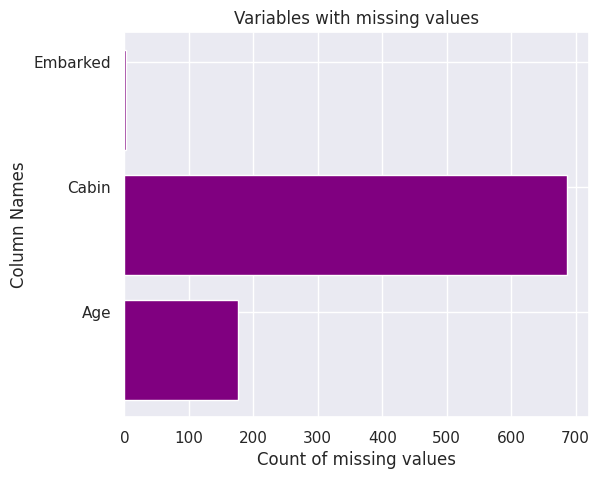

In [ ]:
# Train split

labels = []
values = []
for col in null_columns:
    labels.append(col)
    values.append(titanic_train[col].isnull().sum())
ind = np.arange(len(labels))
width=0.6
fig, ax = plt.subplots(figsize=(6,5))
rects = ax.barh(ind, np.array(values), color='purple')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values");

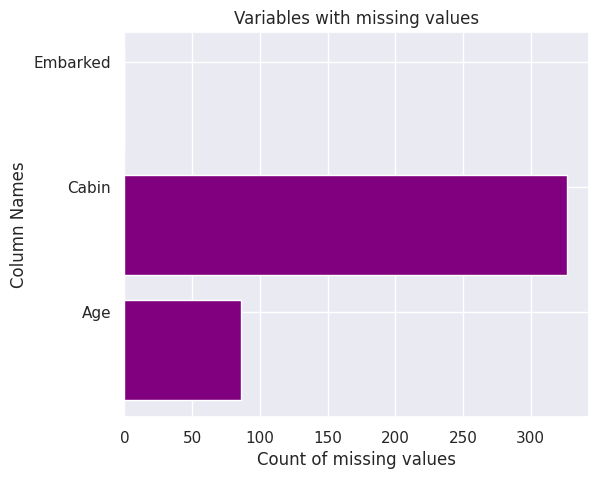

In [ ]:
# Test split

labels = []
values = []
for col in null_columns:
    labels.append(col)
    values.append(titanic_test[col].isnull().sum())
ind = np.arange(len(labels))
width=0.6
fig, ax = plt.subplots(figsize=(6,5))
rects = ax.barh(ind, np.array(values), color='purple')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values");

# Exploratory Data Analysis (EDA) of the dataset

**Observation:** The distribution of "Age" and "Fare" columns appears to be right-skewed, Hence feature scaling is required.

**Inferences:**

Age: There are more younger passengers compared to older passengers.

Fare: Most passengers paid lower fares.









array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

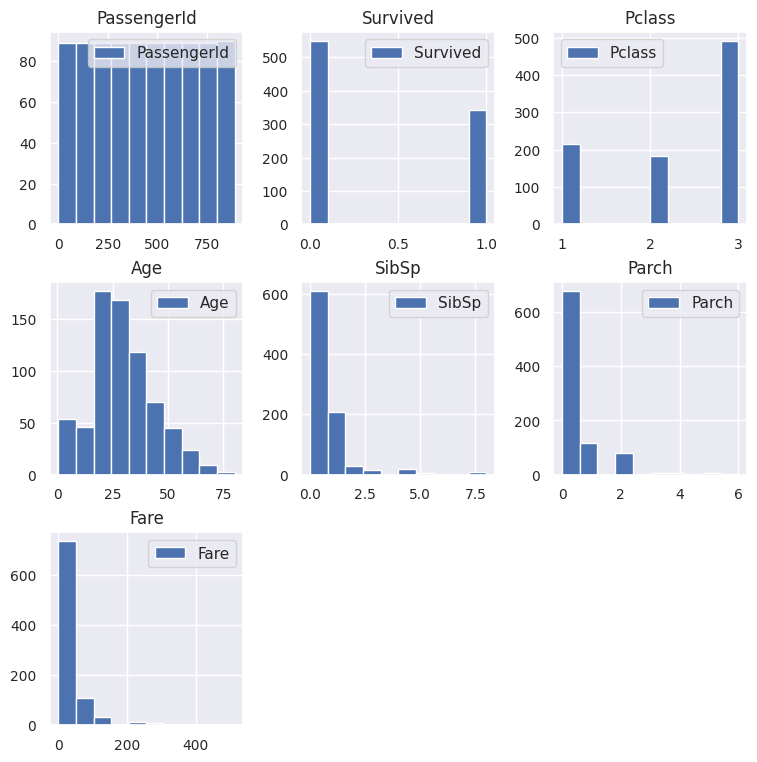

In [ ]:
titanic_train.hist(bins=10,
                   figsize=(9,9),
                   grid=True,
                   legend=True,
                   xlabelsize = 10,
                   ylabelsize = 10)

**Observations:** The age distribution of passengers varies across different combinations of sex and survival. For both males and females, the age distribution suggests that younger passengers were more likely to survive.

There might be noticeable differences in the age distributions between males and females within each survival category.

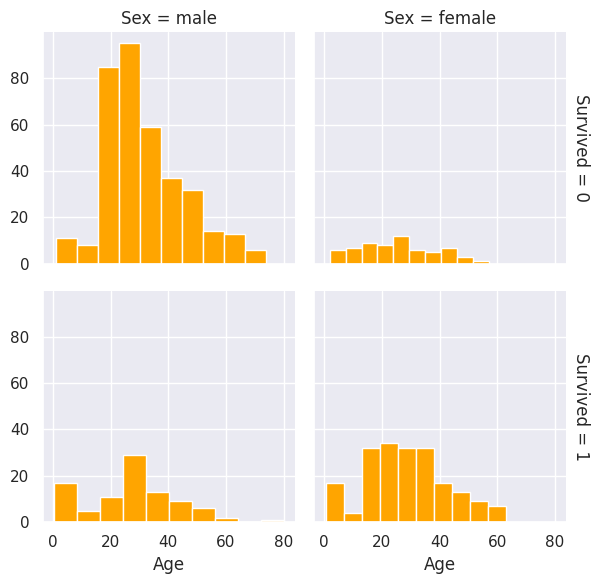

In [ ]:
fg = sns.FacetGrid(titanic_train,
                  col="Sex",
                  row="Survived",
                  margin_titles=True)

fg.map(plt.hist, "Age",color="orange").add_legend()

**Observations:**

1. Younger passengers in Pclass 3 have a higher density among those who didn't survive.
2. Older passengers are more prevalent in Pclass 1, and a larger proportion of them survived compared to the other classes.
3. Scatterplot indicates that the survival rates vary significantly with both age and class.
4. Passengers who paid higher fares(Pclass=1) have a better survival rate. indicated by more yellow points (survived) at higher fares.
5. Age distribution is not strongly correlated with survival as fare.

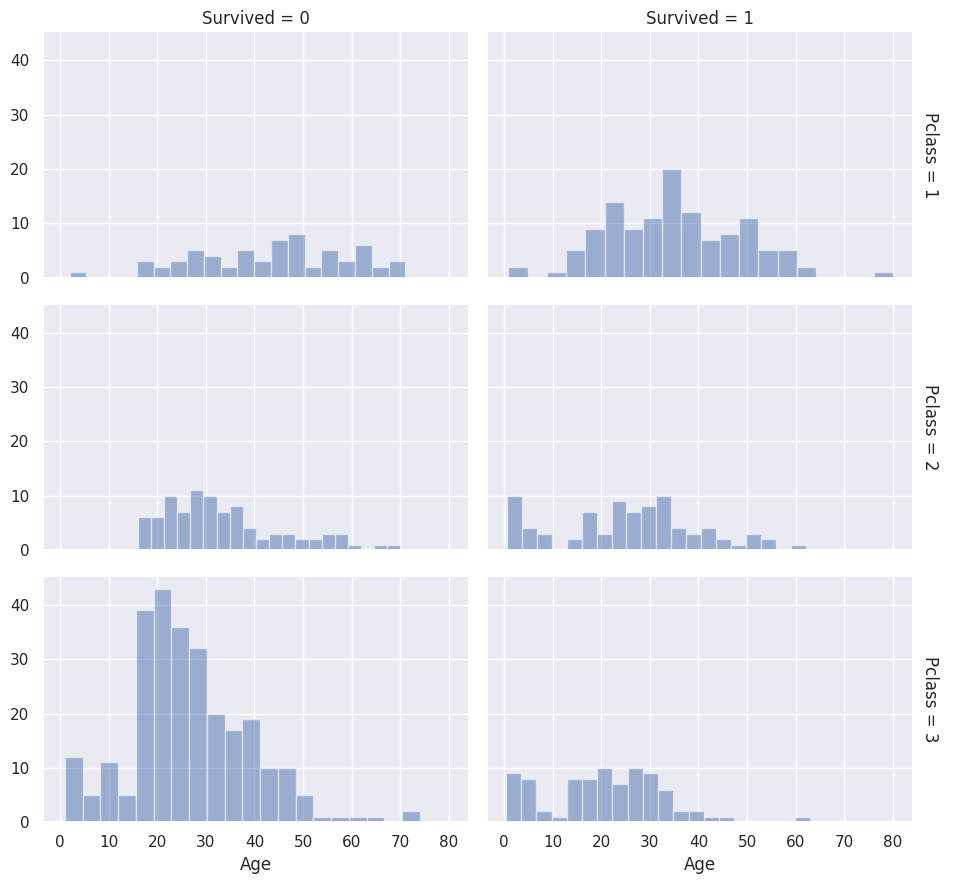

In [ ]:
fg = sns.FacetGrid(titanic_train,
                     col='Survived',
                     row='Pclass',
                     aspect=1.6,
                     margin_titles=True,
                     palette={1:"green", 0:"red"})

fg.map(plt.hist, 'Age', alpha=.5, bins=20).add_legend()

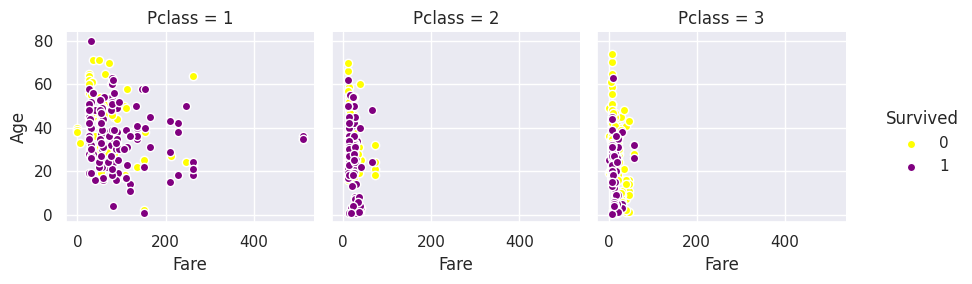

In [ ]:
fg = sns.FacetGrid(titanic_train,
                  hue="Survived",
                  col="Pclass",
                  margin_titles=True,
                  palette={1:"purple", 0:"yellow"})

fg=fg.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()

**Observations:**

1. Younger passengers, especially females, show better survival outcomes.
2. Among males, survival appears less dependent on age compared to females.
3. Most males who survived are concentrated in the lower fare range.

Text(0.5, 0.98, 'Survival by Gender , Age and Fare')

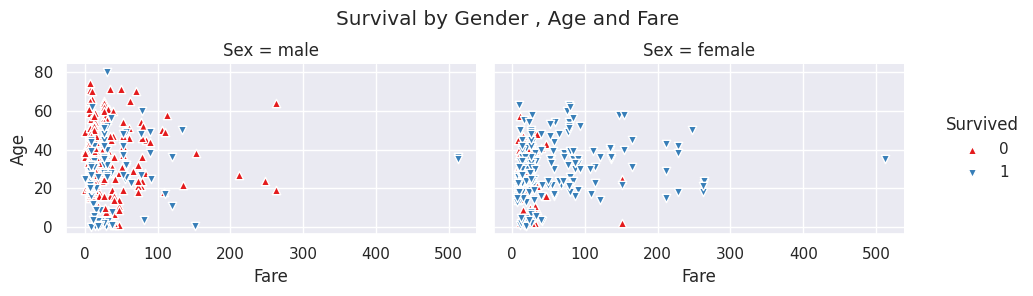

In [ ]:
fg = sns.FacetGrid(titanic_train,
                   hue="Survived",
                   col="Sex",
                   margin_titles=True,
                   aspect=1.6,
                   palette="Set1",
                   hue_kws=dict(marker=["^", "v"]))

fg.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()

plt.subplots_adjust(top=0.8)

fg.fig.suptitle('Survival by Gender , Age and Fare')

**Observations:**

1. Passenger class and gender heavily influenced survival. (Females in higher classes had the best chances of survival, while males in third class fared the worst.)

Text(0.5, 0.98, 'Survival of passengers genderwise for each class')

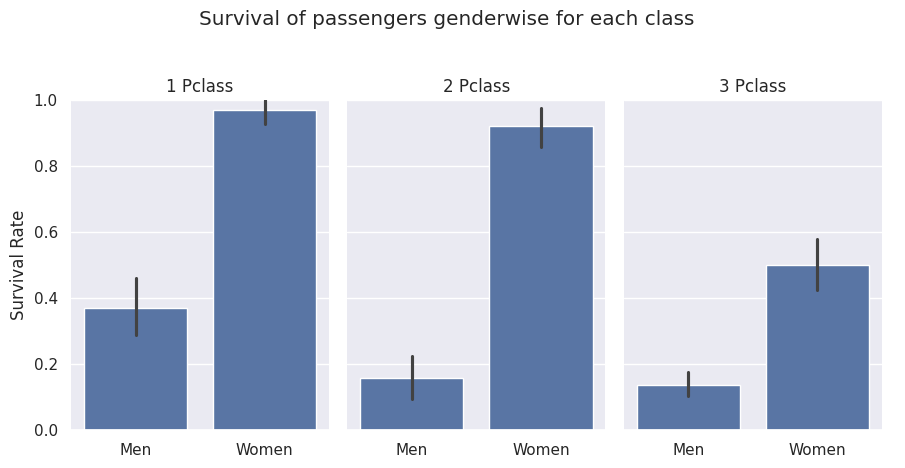

In [ ]:
sns.set(font_scale=1)

cp = sns.catplot(x="Sex",
                y="Survived",
                col="Pclass",
                data=titanic_train,
                kind="bar",
                aspect=.6)

(cp.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))

plt.subplots_adjust(top=0.8)

cp.fig.suptitle('Survival of passengers genderwise for each class')

### **Correlation between numerical features**

1. Fare and Survived: A moderate positive correlation (0.26) indicates passengers who paid higher fares were more likely to survive.

2. Pclass and Fare: A strong negative correlation (-0.55) suggests passengers in higher classes (lower Pclass values) paid higher fares.

3. SibSp and Parch: A moderate positive correlation (0.41) indicates families traveling together (more siblings/spouses and parents/children) are somewhat related.

4. Pclass and Survived: A weak negative correlation (-0.34) indicates passengers in higher classes (lower Pclass values) were more likely to survive.



Text(0.5, 1.0, 'Correlation between numerical features')

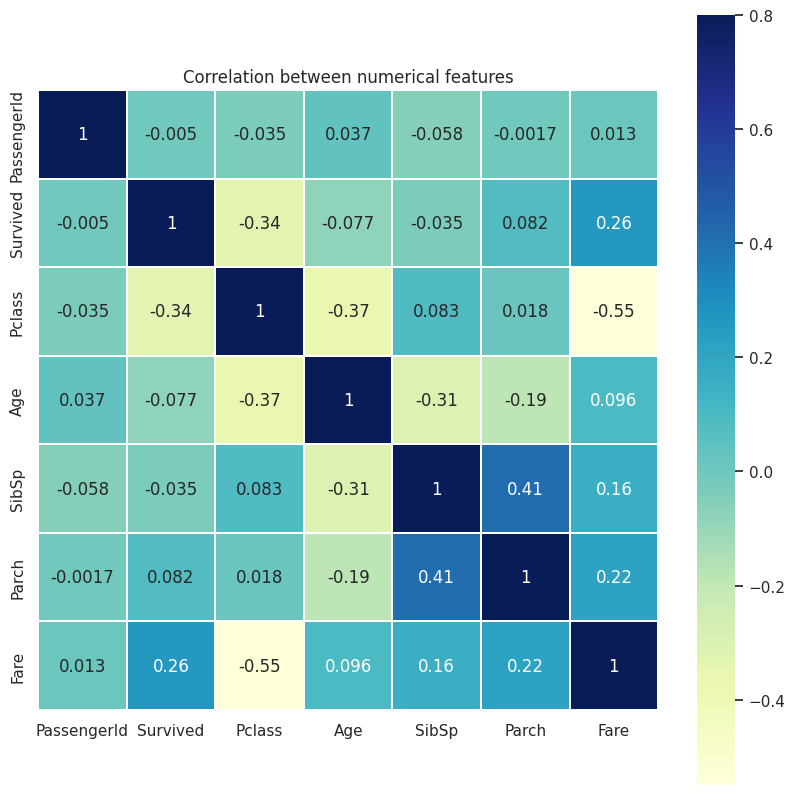

In [ ]:
titanic_train_subset = titanic_train.drop(["Name", "Sex", "Ticket", "Cabin", "Embarked"], axis=1)


corr=titanic_train_subset.corr() #["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")

plt.title('Correlation between numerical features')

### **Correlation coefficients between numerical features and the target variable (Survived).**

**Observation**

1. Strongest positive correlation: Fare (wealthier passengers had better survival odds).
2. Strongest negative correlation: Pclass (lower class had poorer survival rates).
3. Other variables like Age, SibSp, and Parch show weak correlations, implying their influence on survival was minimal or not straightforward.



In [ ]:
titanic_train_subset.corr()["Survived"]

,Survived
PassengerId,-0.005007
Survived,1.000000
Pclass,-0.338481
Age,-0.077221
SibSp,-0.035322
Parch,0.081629
Fare,0.257307


**Observation**

1. First-class passengers are generally older, while third-class passengers tend to be younger.
2. Female passengers often show a different age distribution compared to males, especially in third class.
3. The port of embarkation appears to influence the distribution of ages, suggesting potential socioeconomic or regional patterns.

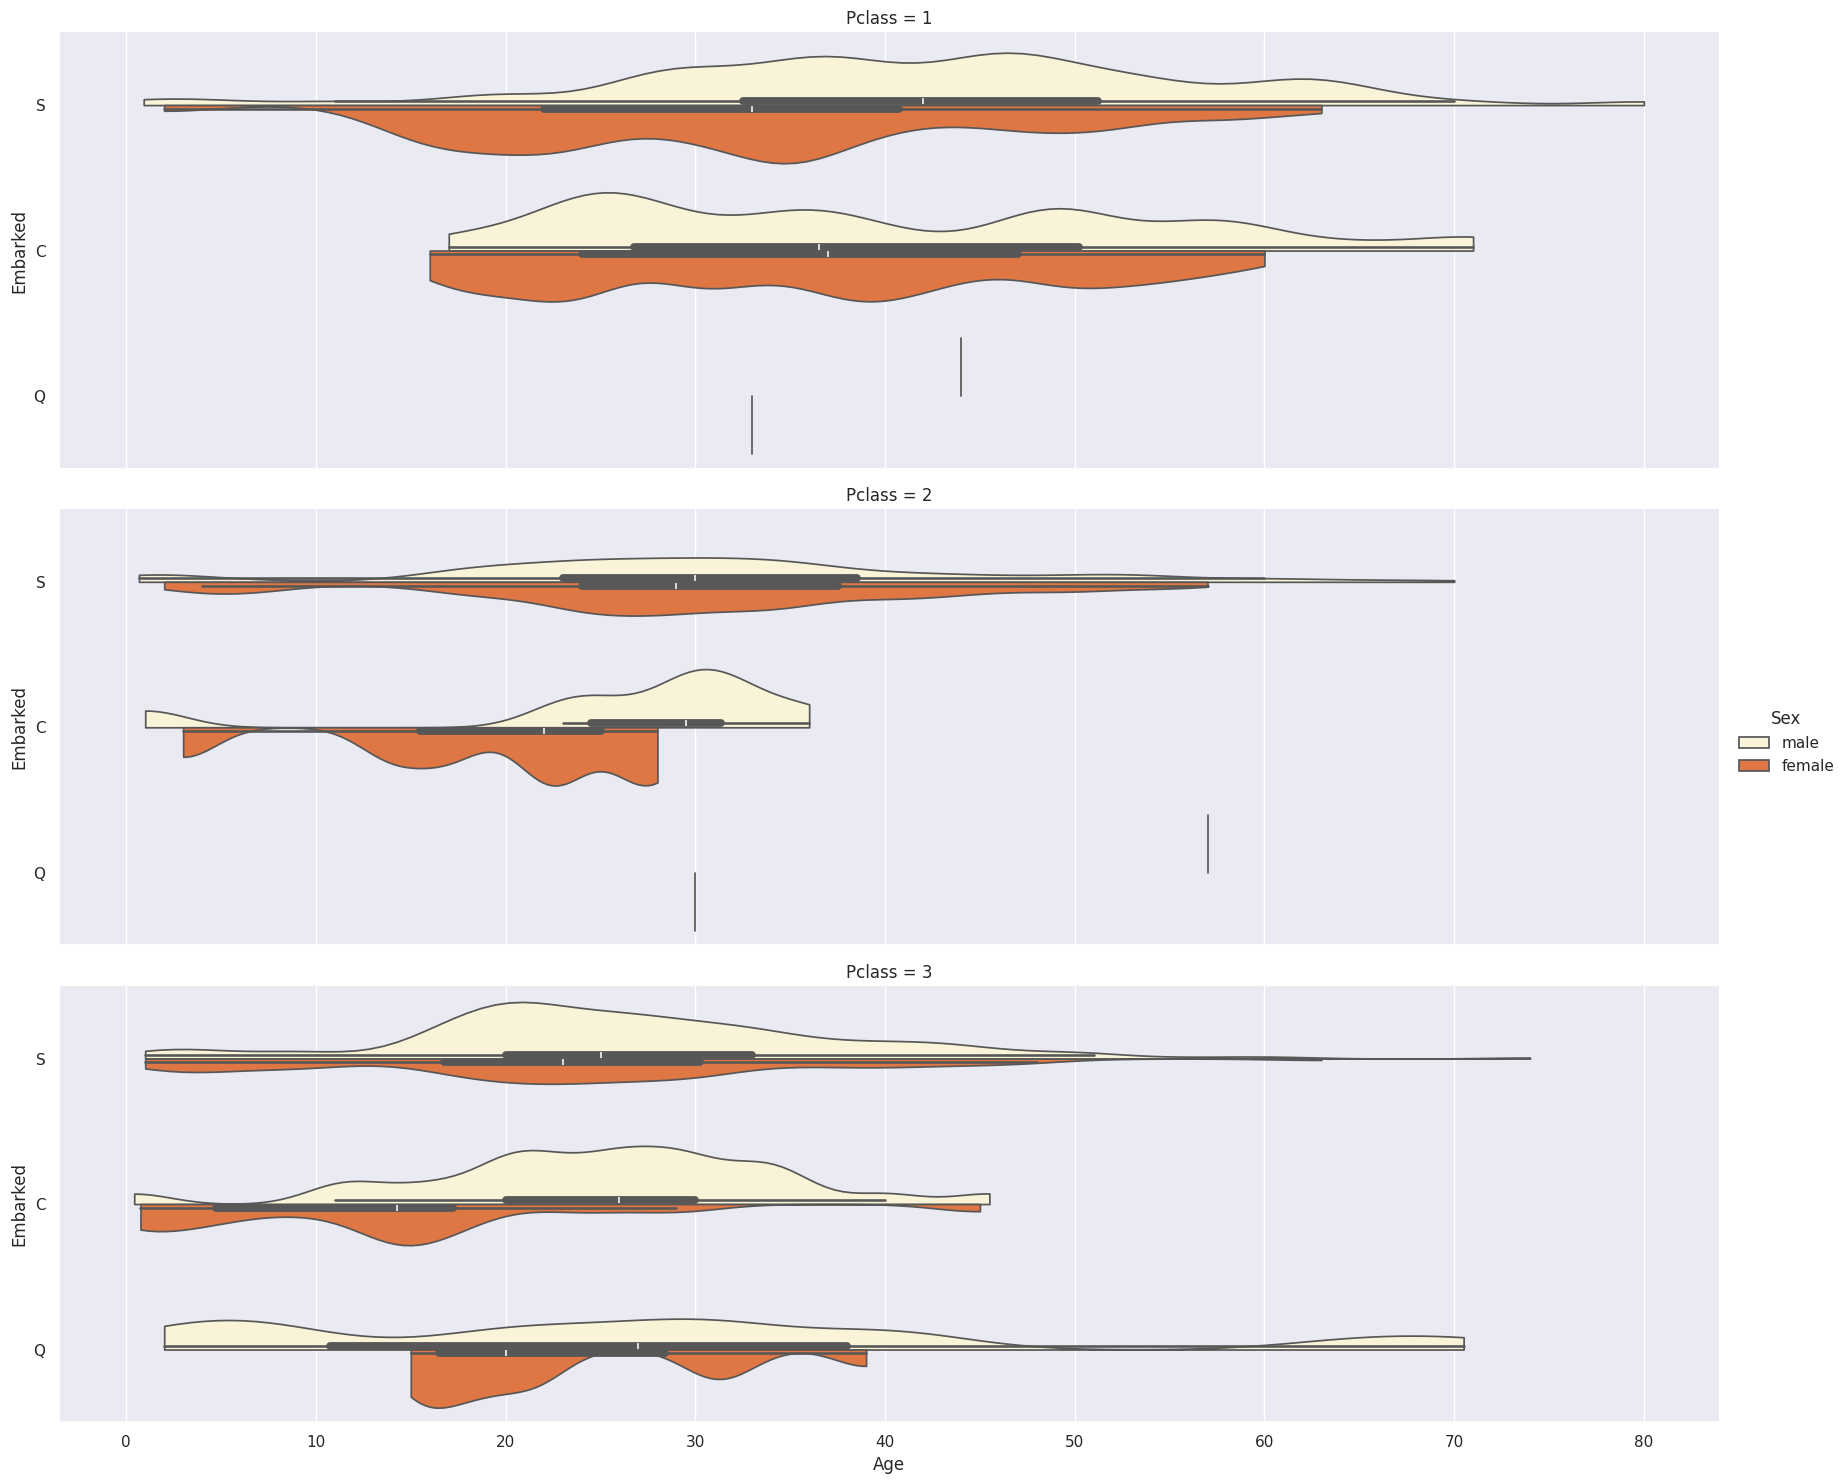

In [ ]:
vp = sns.catplot(x="Age",
                 y="Embarked",
                 hue="Sex",
                 row="Pclass",
                 data=titanic_train[titanic_train.Embarked.notnull()],
                 orient="h",
                 aspect=3.5,
                 palette={'male':"#FFF7D1", 'female':"#F96E2A"},
                 kind="violin",
                 split=True,
                 cut=0,
                 bw=0.2)

# Missing Value Imputation

Since a lot of the ML algorithm can (Decision Trees/ Random Forest) and cannot (Support Vector Machine) handle missing values, I am going to go with the safe option and impute missing values.

# Train split

In [ ]:
titanic_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### **Imputing "Embarked" column data**

In [ ]:
titanic_train[titanic_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


**Observation:**

Both 62 & 830 PassengerId holders have (Passenger class, fare) = (1, $80), Ploting a graph to visualize and guess their embarkment point.



<Axes: xlabel='Embarked', ylabel='Fare'>

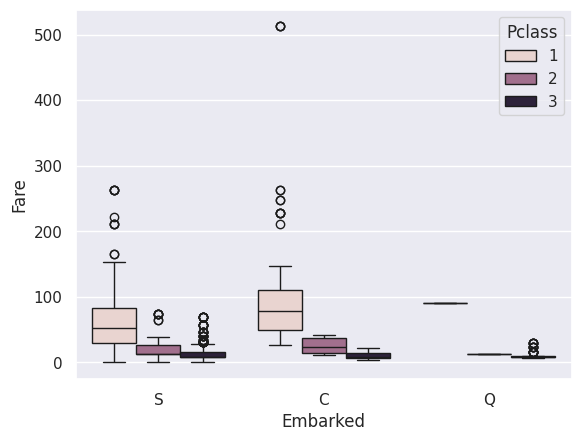

In [ ]:
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=titanic_train)

**Decision:**

1st class median line is coming around fare $80 for embarked value 'C'. Hence, we are imputing the value 'C' for that column

In [ ]:
titanic_train["Embarked"] = titanic_train["Embarked"].fillna('C')
titanic_train[titanic_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### **Imputing "Age" column data**

In [ ]:
titanic_train[titanic_train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S



**Task:** Checking the distribution of the "Age" column.

**Observation:** The "Age" distribution appears to be right/positively skewed.

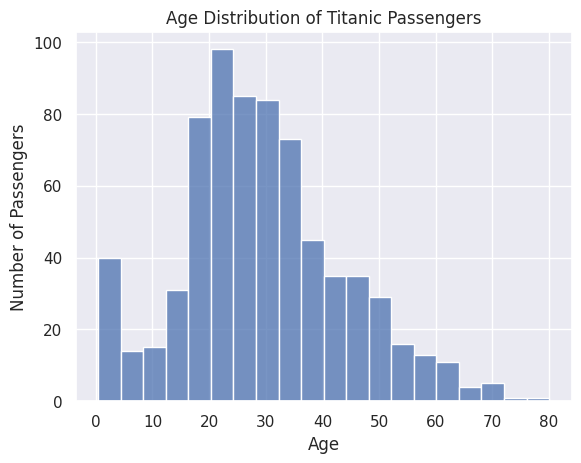

In [ ]:
sns.histplot(titanic_train['Age'], bins=20)

plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Age Distribution of Titanic Passengers')
plt.show()

**Observation:** Since the "Age" distribution appears to be right/positively skewed, I cannot use the mean/median imputation like in the case of normal distribution.

**Decision:** Utilizing an ML regression algorithm/model (Random Forest) to predict missing Age values based on other features. (Pclass, Fare, SibSp & Parch)

In [ ]:
age_train = titanic_train[titanic_train['Age'].notnull()] #train split with not null
age_test = titanic_train[titanic_train['Age'].isnull()] #test split with null

features = ['Pclass', 'Fare', 'SibSp', 'Parch'] # features for prediction

age_train = pd.get_dummies(age_train, columns=['Sex'], drop_first=True)
age_test = pd.get_dummies(age_test, columns=['Sex'], drop_first=True)

rf_model = RandomForestRegressor(random_state=42) #model selection
rf_model.fit(age_train[features], age_train['Age']) #predicting the values

titanic_train.loc[titanic_train['Age'].isnull(), 'Age'] = rf_model.predict(age_test[features]) # Predict and fill missing values

In [ ]:
titanic_train[titanic_train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# Test split


In [ ]:
titanic_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


### **Imputing "Age" column data**

In [ ]:
titanic_test[titanic_test['Age'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


**Task:** Checking the distribution of the "Age" column.

**Observation:** The "Age" distribution appears to be right/positively skewed.

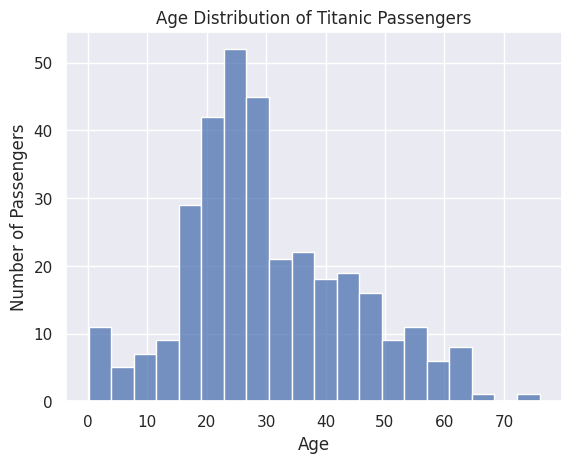

In [ ]:
sns.histplot(titanic_test['Age'], bins=20)

plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Age Distribution of Titanic Passengers')
plt.show()

**Observation:** Since the "Age" distribution appears to be right/positively skewed, I cannot use the mean/median imputation like in the case of normal distribution.

**Decision:** Utilizing an ML regression algorithm/model (Random Forest) to predict missing Age values based on other features. (Pclass, Fare, SibSp & Parch)

In [ ]:
age_train = titanic_test[titanic_test['Age'].notnull()] #train split with not null
age_test = titanic_test[titanic_test['Age'].isnull()] #test split with null


features = ['Pclass', 'Fare', 'SibSp', 'Parch'] # features for prediction

age_train = pd.get_dummies(age_train, columns=['Sex'], drop_first=True)
age_test = pd.get_dummies(age_test, columns=['Sex'], drop_first=True)

rf_model = RandomForestRegressor(random_state=42) #model selection
rf_model.fit(age_train[features], age_train['Age']) #predicting the values

titanic_test.loc[titanic_test['Age'].isnull(), 'Age'] = rf_model.predict(age_test[features]) # Predict and fill missing values

In [ ]:
titanic_test[titanic_test['Age'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### **Imputing "Fare" column data**

In [ ]:
titanic_test[titanic_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


**Observation & Decision:** Since only one value is missing, replacing the missing value with the median of all fares of those passengers who had
      
    Pclass == 3 and Embarked == 'S'

In [ ]:
median_fare=titanic_test[(titanic_test['Pclass'] == 3) & (titanic_test['Embarked'] == 'S')]['Fare'].median()
titanic_test["Fare"] = titanic_test["Fare"].fillna(median_fare)

In [ ]:
titanic_test[titanic_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# Feature Engineering

###**1. Deck: The exact place of the ship where the passengers were assigned/situated**

In [ ]:
titanic_train["Deck"]=titanic_train.Cabin.str[0]
titanic_test["Deck"]=titanic_test.Cabin.str[0]
titanic_train["Deck"].unique() # 0 is for null values

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

*Deckwise location*

Observations:

1. Some decks (B/C) have a higher number of survivors.
2. Equal number of survivor from deck G.

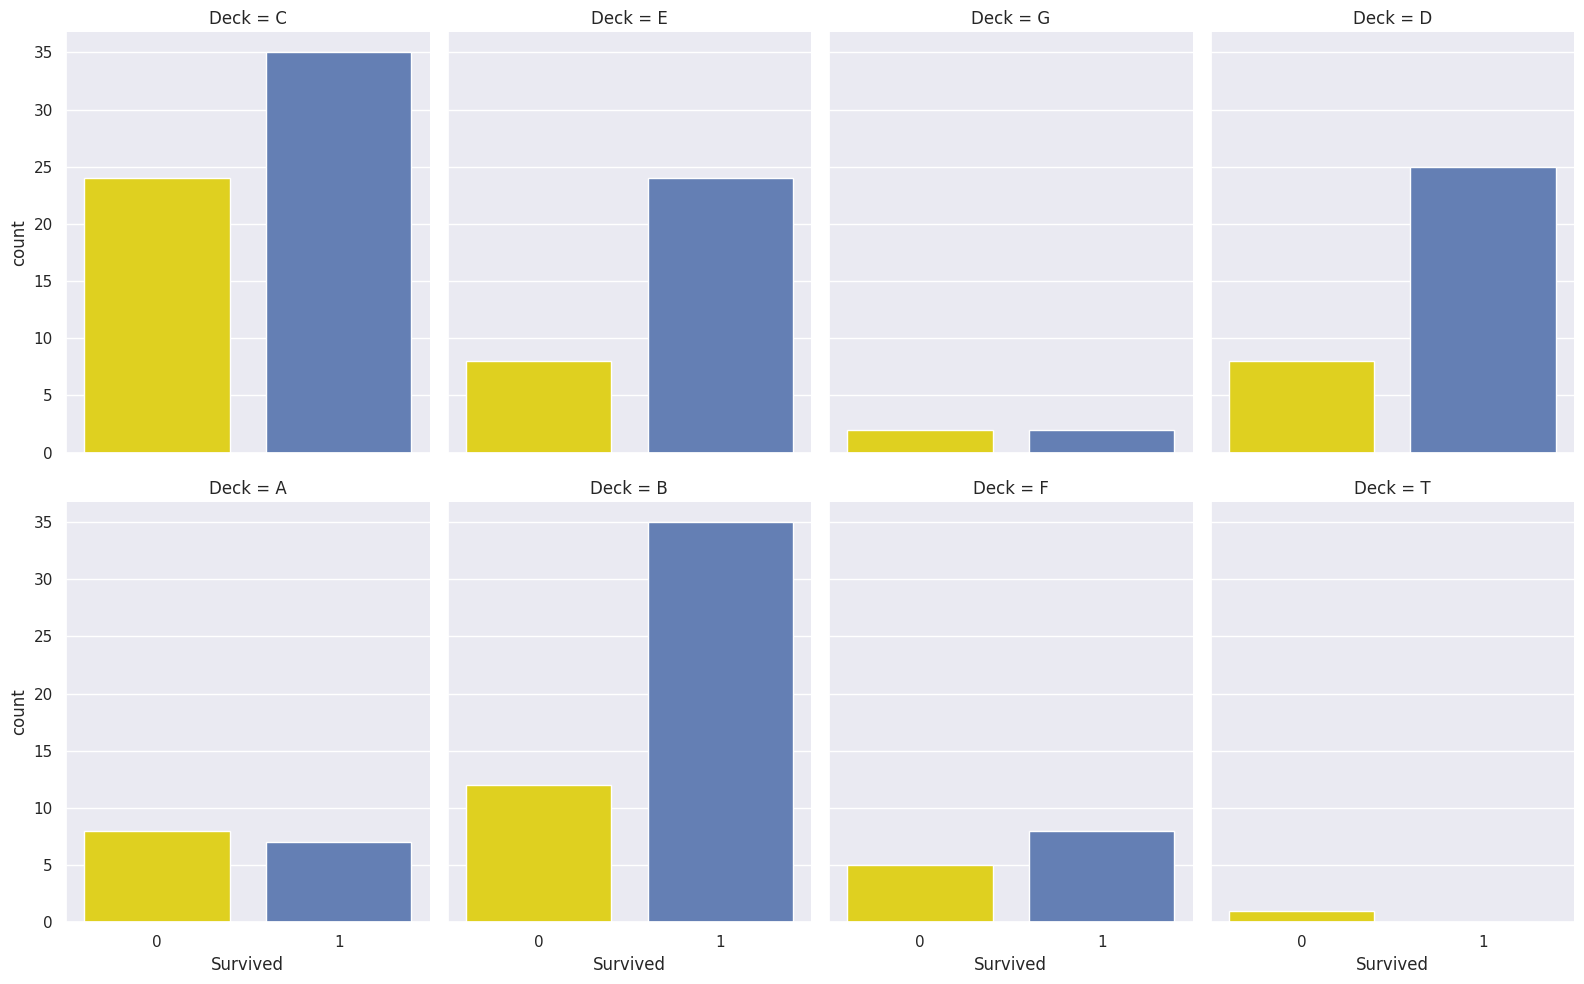

In [ ]:
deck_loc = sns.catplot(x="Survived",
                       col="Deck",
                       col_wrap=4,
                       data=titanic_train[titanic_train.Deck.notnull()],
                       palette={'1':"#577BC1", '0':"#FFEB00"},
                       kind="count",
                       aspect=.8)

*Deckwise location based on Pclass*

**Observations:**

1. Deck A has higher proportion of older passengers in Pclass 1 compared to Pclass 3.

**Assumption:**

1.  The distribution of ages within each deck suggests that passenger age might play a role in choosing certain decks.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


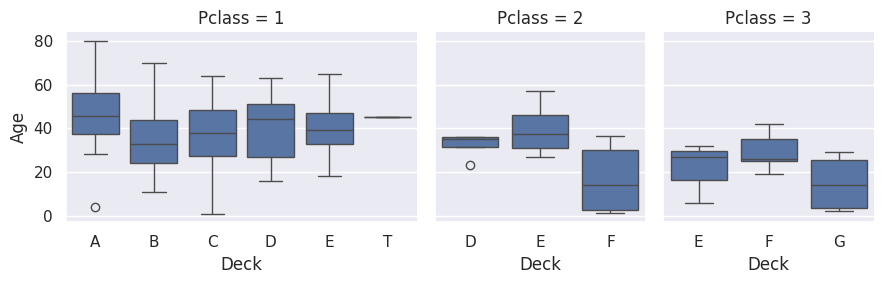

In [ ]:
titanic_train = titanic_train.assign(Deck=titanic_train.Deck.astype(object)).sort_values("Deck")

fg_c = sns.FacetGrid(titanic_train,
                  col="Pclass",
                  sharex=False,
                  gridspec_kws={"width_ratios": [5, 3, 3]})

fg_c.map(sns.boxplot, "Deck", "Age");

Filling the null values with "Z"

In [ ]:
titanic_train.Deck.fillna('Z', inplace=True)
titanic_test.Deck.fillna('Z', inplace=True)
titanic_train["Deck"].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'Z'], dtype=object)

In [ ]:
titanic_train[titanic_train['Deck'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck


In [ ]:
titanic_test[titanic_test['Deck'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck


###**2. FamilySize: Defining family sizes**

FamilySize = Feature based on number of siblings/spouse and number of children/parents (Including passenger themselves).

In [ ]:
titanic_train["FamilySize"] = titanic_train["SibSp"] + titanic_train["Parch"]+1
titanic_test["FamilySize"] = titanic_test["SibSp"] + titanic_test["Parch"]+1

In [ ]:
print("Train split")
print()
print(titanic_train["FamilySize"].value_counts())
print()
print("========================================")
print()
print("Test split")
print()
print(titanic_test["FamilySize"].value_counts())

Train split

FamilySize
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64


Test split

FamilySize
1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: count, dtype: int64


**Observations:**

1. The singletons survived and died the most.
2. The greater the familysize the less likely they are to survive.

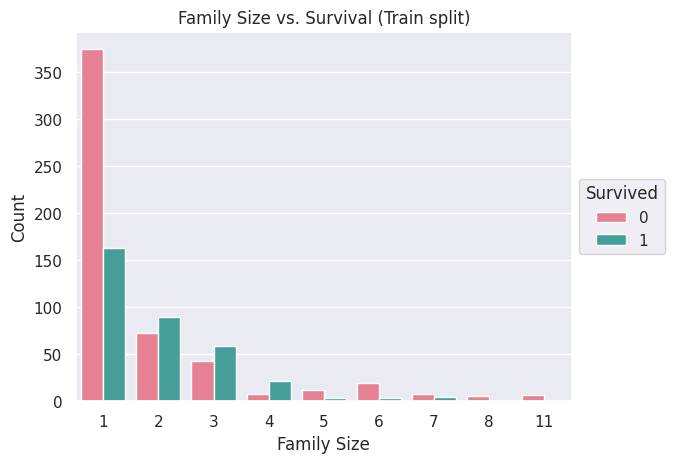

In [ ]:
# Train split

sns.countplot(x='FamilySize', hue='Survived', data=titanic_train, palette='husl')
plt.title('Family Size vs. Survival (Train split)')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**Making groups/clusters based on family sizes**

*Family sizes:*

Singleton: 1

Small: 2 ~ 4

Large: 5<

In [ ]:
titanic_train.loc[titanic_train["FamilySize"] == 1, "FsizeD"] = 'singleton'
titanic_train.loc[(titanic_train["FamilySize"] > 1)  &  (titanic_train["FamilySize"] < 5) , "FsizeD"] = 'small'
titanic_train.loc[titanic_train["FamilySize"] >4, "FsizeD"] = 'large'

titanic_test.loc[titanic_test["FamilySize"] == 1, "FsizeD"] = 'singleton'
titanic_test.loc[(titanic_test["FamilySize"] >1) & (titanic_test["FamilySize"] <5) , "FsizeD"] = 'small'
titanic_test.loc[titanic_test["FamilySize"] >4, "FsizeD"] = 'large'

**Observation:**
Most of the passengers were singletons

In [ ]:
print(titanic_train["FsizeD"].unique())
print()
print("========================================")
print()
titanic_train["FsizeD"].value_counts()

['singleton' 'small' 'large']




,count
FsizeD,
singleton,537
small,292
large,62


In [ ]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,FsizeD
475,476,0,1,"Clifford, Mr. George Quincy",male,45.092024,0,0,110465,52.0000,A14,S,A,1,singleton
174,175,0,1,"Smith, Mr. James Clinch",male,56.000000,0,0,17764,30.6958,A7,C,A,1,singleton
209,210,1,1,"Blank, Mr. Henry",male,40.000000,0,0,112277,31.0000,A31,C,A,1,singleton
445,446,1,1,"Dodge, Master. Washington",male,4.000000,0,2,33638,81.8583,A34,S,A,3,small
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.000000,0,0,13213,35.5000,A26,C,A,1,singleton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S,Z,1,singleton
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q,Z,6,large
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,Z,1,singleton
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,15.938500,1,2,W./C. 6607,23.4500,NaN,S,Z,4,small


# Convert Categorical variables into Numerical ones

In [ ]:
cat_vars=["Embarked","Sex","FsizeD","Deck"]

for col in cat_vars:
    titanic_train[col]=labelEnc.fit_transform(titanic_train[col])
    titanic_test[col]=labelEnc.fit_transform(titanic_test[col])

titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,FsizeD
475,476,0,1,"Clifford, Mr. George Quincy",1,45.092024,0,0,110465,52.0000,A14,2,0,1,1
174,175,0,1,"Smith, Mr. James Clinch",1,56.000000,0,0,17764,30.6958,A7,0,0,1,1
209,210,1,1,"Blank, Mr. Henry",1,40.000000,0,0,112277,31.0000,A31,0,0,1,1
445,446,1,1,"Dodge, Master. Washington",1,4.000000,0,2,33638,81.8583,A34,2,0,3,2
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",1,56.000000,0,0,13213,35.5000,A26,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",1,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,2,8,1,1
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,39.000000,0,5,382652,29.1250,NaN,1,8,6,0
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,2,8,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,15.938500,1,2,W./C. 6607,23.4500,NaN,2,8,4,2


# Feature Scaling

The "Age" and "Fare" values are on different scales, scakling these two features for better or more accurate prediction

In [ ]:
#train split

std_scale = sScaleProcessor.fit(titanic_train[['Age', 'Fare']])
titanic_train[['Age', 'Fare']] = std_scale.transform(titanic_train[['Age', 'Fare']])

#test split
std_scale = sScaleProcessor.fit(titanic_test[['Age', 'Fare']])
titanic_test[['Age', 'Fare']] = std_scale.transform(titanic_test[['Age', 'Fare']])

# Predicting Survival using ML algorithms


###**1. Linear Regression**

In [ ]:
predictors = ["Pclass", "Sex", "Age","SibSp", "Parch", "Fare", "Embarked", "FsizeD","Deck"]
target="Survived"

linReg = LinearRegression()

kf = KFold(titanic_train.shape[0],
           # n_splits=5, #by default
           shuffle=True,
           random_state=42)

predictions = []


for train, test in kf.split(titanic_train):
    train_predictors = (titanic_train[predictors].iloc[train,:]) # The predictors we're using the train the algorithm.  Note how we only take the rows in the train folds.
    train_target = titanic_train[target].iloc[train] # The target we're using to train the algorithm.

    linReg.fit(train_predictors, train_target)
    test_predictions = linReg.predict(titanic_train[predictors].iloc[test,:])
    predictions.append(test_predictions)


predictions = np.concatenate(predictions, axis=0)
predictions[predictions > .5] = 1
predictions[predictions <=.5] = 0

accuracy=sum(titanic_train["Survived"]==predictions)/len(titanic_train["Survived"])
print(f"Prediction accuracy using the Linear Regression algorithm: {round(accuracy,3)}")

Prediction accuracy using the Linear Regression algorithm: 0.526


###**2. Logistic Regression**

In [ ]:
predictors = ["Pclass", "Sex", "Age","SibSp", "Parch", "Fare", "Embarked", "FsizeD","Deck"]
target="Survived"

logReg = LogisticRegression(random_state=42)

cv = ShuffleSplit(n_splits=10,
                  test_size=0.2,
                  random_state=42)

scores = cross_val_score(logReg,
                         titanic_train[predictors],
                         titanic_train["Survived"],
                         scoring='f1',
                         cv=cv)

print(f"F1 score (mean) using the Logistic Regression algorithm: {round(scores.mean(),3)}") # mean of the scores as we have one for each fold

F1 score (mean) using the Logistic Regression algorithm: 0.756


###**3. Random Forest**

In [ ]:
predictors = ["PassengerId","Pclass", "Sex", "Age","SibSp", "Parch", "Fare", "Embarked", "Deck", "FamilySize", "FsizeD"]
target="Survived"

predictions = []

rf = RandomForestClassifier(random_state=42,
                            n_estimators=50,
                            max_depth=9,
                            min_samples_split=6,
                            min_samples_leaf=4)


rf.fit(titanic_train[predictors], titanic_train[target])

preds = rf.predict(titanic_train[predictors])
mae = mean_absolute_error(titanic_train[target], preds)

print(f"Prediction accuracy using the Random Forest algorithm: {round(mae,3)}")

Prediction accuracy using the Random Forest algorithm: 0.105


###**Still Random Forest but with hyperparameter tuned**

Observation: The accuracy increased a little

In [ ]:
predictors = ["PassengerId","Pclass", "Sex", "Age","SibSp", "Parch", "Fare", "Embarked", "Deck", "FamilySize", "FsizeD"]
target="Survived"

rf = RandomForestClassifier(random_state=42,
                            n_estimators=500,
                            max_depth=9,
                            min_samples_split=6,
                            min_samples_leaf=50)


rf.fit(titanic_train[predictors], titanic_train[target])

preds = rf.predict(titanic_train[predictors])
mae = mean_absolute_error(titanic_train[target], preds)

print(f"Prediction accuracy using the Random Forest algorithm (with tuned hyperparameters): {round(mae,3)}") # mean of the scores as we have one for each fold

Prediction accuracy using the Random Forest algorithm (with tuned hyperparameters): 0.203


#####**Important features according to Random Forest**

The features that were orderly important for the Random Forest model to reach to this conclusion.

(-1.0, 11.0)

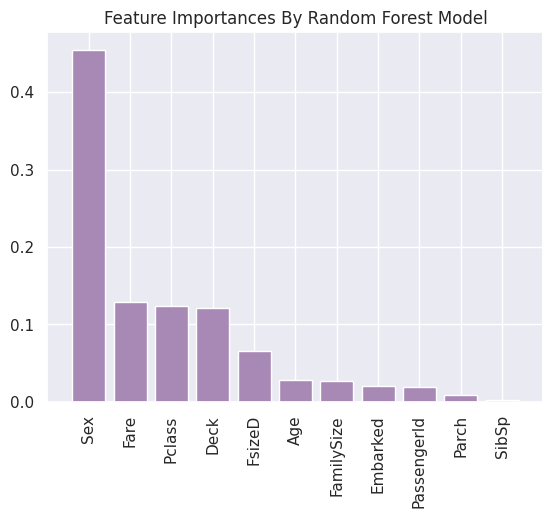

In [ ]:
importances=rf.feature_importances_
std = np.std([rf.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
sorted_important_features=[]

for i in indices:
    sorted_important_features.append(predictors[i])


plt.figure()
plt.title("Feature Importances By Random Forest Model")
plt.bar(range(np.size(predictors)),
        importances[indices],
        color="#A888B5",
        yerr=std[indices],
        align="center")

plt.xticks(range(np.size(predictors)),
           sorted_important_features,
           rotation='vertical')

plt.xlim([-1, np.size(predictors)])

#####**Important features based on SelectKBest**

*SelectKBest* selects the important features relying on statistical measures like chi-squared test, ANOVA F-test or mutual information to score and rank the features.

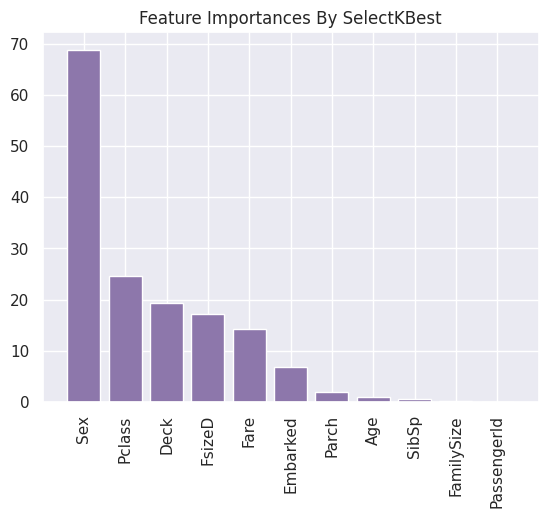

In [ ]:
predictors = ["PassengerId","Pclass", "Sex", "Age","SibSp", "Parch", "Fare", "Embarked", "Deck", "FamilySize", "FsizeD"]
target="Survived"

selector = SelectKBest(f_classif, k=5)
selector.fit(titanic_train[predictors], titanic_train["Survived"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

indices = np.argsort(scores)[::-1]

sorted_important_features=[]

for i in indices:
    sorted_important_features.append(predictors[i])

plt.figure()
plt.title("Feature Importances By SelectKBest")
plt.bar(range(np.size(predictors)),
        scores[indices],
       color="#8D77AB",
        yerr=std[indices],
        align="center")

plt.xticks(range(np.size(predictors)),
           sorted_important_features,
           rotation='vertical')

plt.xlim([-1, np.size(predictors)]);

###**4. AdaBoost**

In [ ]:
predictors = ["PassengerId","Pclass", "Sex", "Age","SibSp", "Parch", "Fare", "Embarked", "Deck", "FamilySize", "FsizeD"]
target="Survived"

adb=AdaBoostClassifier()

adb.fit(titanic_train[predictors],titanic_train["Survived"])

cv = ShuffleSplit(n_splits=10,
                  test_size=0.2,
                  random_state=42)

scores = cross_val_score(adb,
                         titanic_train[predictors],
                         titanic_train["Survived"],
                         scoring='f1',
                         cv=cv)

print(f"F1 score (mean) using the AdaBoost algorithm: {round(scores.mean(),3)}")

F1 score (mean) using the AdaBoost algorithm: 0.749


###**5. Gradient Boosting**

In [ ]:
predictors = ["PassengerId", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Deck", "FamilySize", "FsizeD"]
target = "Survived"

xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    use_label_encoder=False
)

xgb_model.fit(titanic_train[predictors], titanic_train[target])
preds = xgb_model.predict(titanic_train[predictors])

# Evaluate the model
accuracy = accuracy_score(titanic_train[target], preds)
print(f"Prediction accuracy using the Gradient Boosting algorithm: {round(accuracy,3)}")
print()
print("\nClassification Report:\n", classification_report(titanic_train[target], preds))

Prediction accuracy using the Gradient Boosting algorithm: 0.889


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       549
           1       0.89      0.81      0.85       342

    accuracy                           0.89       891
   macro avg       0.89      0.87      0.88       891
weighted avg       0.89      0.89      0.89       891



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:00:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


#####**Important features according to Gradient Boosting Algorithm**


<Figure size 1000x800 with 0 Axes>

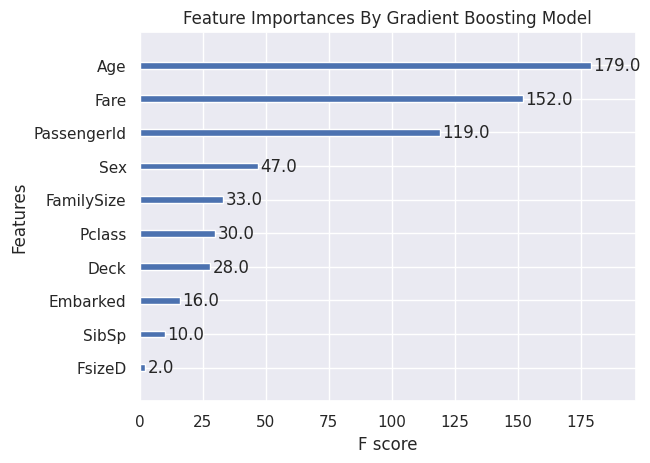

In [ ]:
plt.figure(figsize=(10, 8))
plot_importance(xgb_model)
plt.title("Feature Importances By Gradient Boosting Model")

plt.show()

# Creating an ensemble model final prediction

Developing an ensemble model using Logistic Regression, Random Forest, and AdaBoost as base models. Making predictions on both the training and test data.

In [ ]:
#Train split

predictors = ["PassengerId", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Deck", "FamilySize", "FsizeD"]
target = "Survived"

eclf1 = VotingClassifier(estimators=[('lr', logReg), ('rf', rf), ('adb', adb)], voting='soft')

eclf1 = eclf1.fit(titanic_train[predictors], titanic_train["Survived"])
predictions=eclf1.predict(titanic_train[predictors])
mae = mean_absolute_error(titanic_train[target], predictions)

print(f"Prediction accuracy using the customized ensemble model: {round(mae,3)}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Prediction accuracy using the customized ensemble model: 0.181


In [ ]:
#Test split

predictors = ["PassengerId", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Deck", "FamilySize", "FsizeD"]
target = "Survived"

test_predictions=eclf1.predict(titanic_test[predictors])
test_predictions=test_predictions.astype(int)


submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": test_predictions
    })

submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
final_merged_df = pd.merge(titanic_test, submission, on="PassengerId")

final_merged_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,FsizeD,Survived
0,892,3,"Kelly, Mr. James",1,0.367973,0,0,330911,-0.497079,NaN,1,7,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,1.331503,1,0,363272,-0.511942,NaN,2,7,2,2,0
2,894,2,"Myles, Mr. Thomas Francis",1,2.487739,0,0,240276,-0.463770,NaN,1,7,1,1,0
3,895,3,"Wirz, Mr. Albert",1,-0.210145,0,0,315154,-0.482143,NaN,2,7,1,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,-0.595557,1,1,3101298,-0.417167,NaN,2,7,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,-0.358602,0,0,A.5. 3236,-0.493121,NaN,2,7,1,1,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,0.714844,0,0,PC 17758,1.314552,C105,0,2,1,1,1
415,1307,3,"Saether, Mr. Simon Sivertsen",1,0.676303,0,0,SOTON/O.Q. 3101262,-0.507461,NaN,2,7,1,1,0
416,1308,3,"Ware, Mr. Frederick",1,-0.358602,0,0,359309,-0.493121,NaN,2,7,1,1,0


In [ ]:
final_merged_df.to_csv("titanic_final_merged_df_submission.csv", index = False)